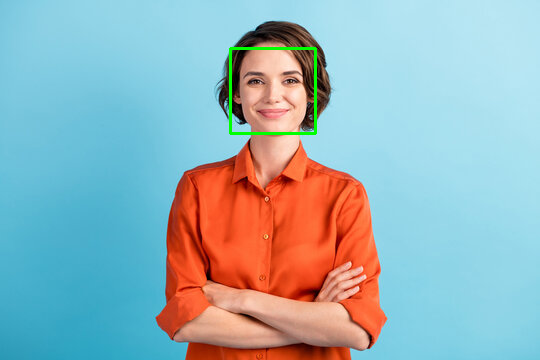

In [12]:
import cv2
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab


face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt.xml')



image = cv2.imread('/content/people1.jpg')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


cv2_imshow(image)


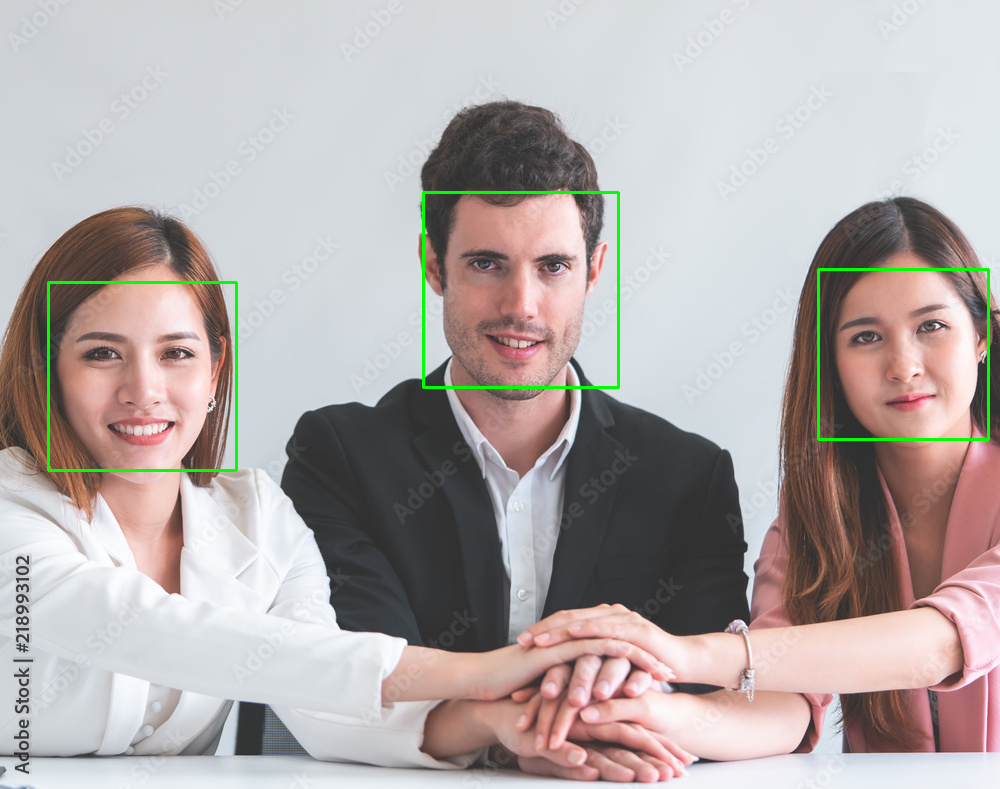

In [14]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_alt.xml')

image = cv2.imread('/content/people3.jpg')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)


cv2_imshow(image)


# PCA for EigenFaces

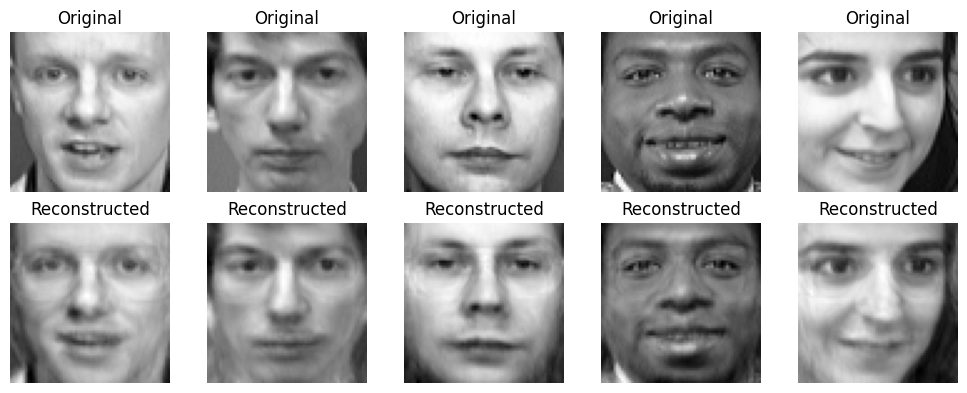

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA


faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_images = faces_data.images
faces_targets = faces_data.target


n_samples, h, w = faces_images.shape
X = faces_images.reshape((n_samples, h * w))


n_components = 100
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X)


X_projected = pca.inverse_transform(X_pca)
reconstructed_faces = X_projected.reshape((-1, h, w))


n_faces_to_display = 5
plt.figure(figsize=(10, 4))
for i in range(n_faces_to_display):

    plt.subplot(2, n_faces_to_display, i + 1)
    plt.imshow(faces_images[i], cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, n_faces_to_display, i + 1 + n_faces_to_display)
    plt.imshow(reconstructed_faces[i], cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()
